In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage.filters import median_filter
from sklearn.cluster import KMeans

import sys
sys.path.append('../..')

import analysis.plotting as pl

import modules.numpy_funcs as nf
import modules.sliding_window as sw
import modules.point_processing as pp

In [2]:
%matplotlib inline

In [3]:
nan = np.nan

step_signal = np.array([-95.56630829,          nan, -78.15425136, -78.81894798,
       -71.63163687, -61.27495678, -66.12785874, -67.90757715,
       -62.75731559, -63.80955308, -65.60490861, -69.10370756,
       -69.13234081, -68.55199243, -70.15700107, -55.63385568,
       -59.06828057, -64.62986496, -61.55759836, -64.46608376,
       -61.50213288, -60.56376064, -58.24302396, -58.98413534,
       -48.32609216, -43.42692644, -23.96247563, -12.64607504,
        -6.13813389,  -2.18294417,  17.0495069 ,  43.2988278 ,
        51.37419197,  62.84523709,  67.7787992 ,  64.54898657,
        60.54191874,  60.4519584 ,  64.48190959,  60.49417039,
        62.54351928,  58.35838403,  53.70820615,  59.9941541 ,
        64.7581504 ,  63.95598798,  62.90839295,  68.77047273,
        64.8614836 ,  66.10117607,  66.85145543,  71.95096187,
        73.6744328 ,  80.97149068,  88.76933145, 105.27473352,
       113.79454627, 117.26332369, 123.4508089 , 125.01451702,
       150.14643891, 175.38411348, 177.86243284, 179.78997636,
       178.92919995, 181.6991404 , 176.12126665, 174.821038  ,
       151.72296028, 157.52657446, 163.95090529, 173.01162629,
       171.3756342 , 174.17433144, 174.73031052, 179.26404485,
       176.84927076,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,  51.91432109])

# step_signal = np.array([-78.15425136, -71.63163687, -71.63163687, -95.56630829,
#        -71.63163687, -67.90757715, -78.81894798, -66.12785874,
#        -66.12785874, -66.12785874, -66.12785874, -66.12785874,
#        -65.60490861, -64.62986496, -64.62986496, -64.62986496,
#        -64.46608376, -61.55759836, -61.50213288, -60.56376064,
#        -59.06828057, -59.06828057, -58.98413534, -58.24302396,
#        -48.32609216, -43.42692644, -23.96247563, -12.64607504,
#         -6.13813389,  -2.18294417,  17.0495069 ,  43.2988278 ,
#         51.37419197,  60.4519584 ,  60.54191874,  60.54191874,
#         62.54351928,  62.54351928,  62.54351928,  60.54191874,
#         60.54191874,  60.54191874,  62.54351928,  62.90839295,
#         62.90839295,  63.95598798,  64.7581504 ,  64.8614836 ,
#         66.10117607,  66.85145543,  68.77047273,  71.95096187,
#         73.6744328 ,  80.97149068,  88.76933145, 105.27473352,
#        113.79454627, 117.26332369, 123.4508089 , 125.01451702,
#        150.14643891, 175.38411348, 176.12126665, 176.12126665,
#        176.12126665, 176.12126665, 176.12126665, 176.12126665,
#        174.821038  , 174.17433144, 174.17433144, 174.17433144,
#        174.17433144, 173.01162629, 173.01162629, 173.01162629,
#        173.01162629, 171.3756342 , 174.17433144, 174.73031052,
#                 nan,          nan,          nan,          nan,
#                 nan,          nan,          nan,          nan,
#                 nan,          nan,          nan,          nan,
#                 nan,          nan,          nan,          nan,
#                 nan,          nan,          nan,          nan,
#                 nan,          nan,          nan,          nan])

In [4]:
def clean_step_signal(step_signal):

    signal_zero = np.where(np.isnan(step_signal), 0, step_signal)
    
    signal_filtered = median_filter(signal_zero, 3, mode='constant')
    
    return np.where(signal_filtered == 0, np.nan, step_signal)

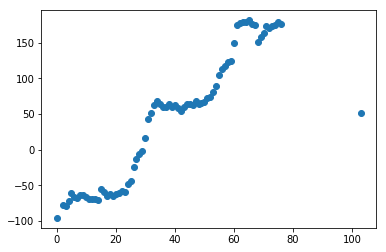

In [5]:
plt.scatter(range(len(step_signal)), step_signal)

In [6]:
step_signal = clean_step_signal(step_signal)

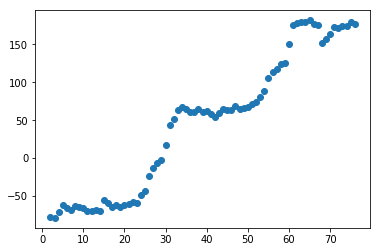

In [7]:
plt.scatter(range(len(step_signal)), step_signal)

In [8]:
pad_width = 5
variances = sw.apply_to_padded(
    step_signal, np.nanvar, pad_width, 'reflect', reflect_type='odd')

points_to_cluster = nf.to_column(nf.remove_nan(np.array(variances)))
k_means = KMeans(n_clusters=2, random_state=0).fit(points_to_cluster)

# is_stance = k_means.labels_ == stance_label

../../modules/sliding_window.py:153: RuntimeWarning: Degrees of freedom <= 0 for slice.
  return [func(x) for x in generate_window(padded, n)]


In [9]:
stance_label = np.argmin(k_means.cluster_centers_)

signal_labels = pp.assign_to_closest(nf.to_column(variances), k_means.cluster_centers_)

In [10]:
is_stance = np.logical_and(signal_labels == stance_label, ~np.isnan(variances))

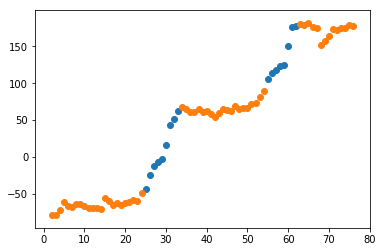

In [11]:
points = np.column_stack([range(len(step_signal)), step_signal])
pl.scatter_labels(points, is_stance)

In [13]:
np.logical_and(signal_labels == stance_label, ~np.isnan(variances))

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
       False, False, False, False, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])